In [ ]:
# plotter for the Wiener SVD unfolding output ROOT file
# background subtract before running through WienerSVD
# compute the cross section after computing the unfolded spectrum

In [1]:
import sys
sys.path.insert(0, 'backend_functions')

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TDirectory

import os

import top 
from top import *

Welcome to JupyROOT 6.18/00


In [2]:
ISRUN3 = False
n_target = parameters(ISRUN3)['n_target']
flux = parameters(ISRUN3)['integrated_flux_per_pot'] * parameters(ISRUN3)['beamon_pot']

In [3]:
xsec_units = False
f = uproot.open('/uboone/data/users/kmiller/unfolding/output_shr_energy_cali_FHCRUN1_MARCH12.root')


#("/uboone/app/users/kmiller/WienerSVD/Wiener-SVD-Unfolding/Test/output_example1.root")

In [4]:
plots_path = parameters(ISRUN3)['plots_path']


In [5]:
# input spectra (true & measured)

In [6]:
h_meas = f["hmeas"]
h_true = f['htrue_signal']

In [7]:
# b_meas = [round(var, 2) for var in h_meas.edges]
# b_true = [round(var, 2) for var in h_true.edges]

bins = [round(var, 2) for var in h_meas.edges]
bincenters = 0.5*(np.array(bins)[1:]+np.array(bins)[:-1])

b_meas = bins
b_true = bins

In [8]:
bincenters

array([0.245, 0.525, 0.825, 2.   ])

In [9]:
meas = h_meas.values
true = h_true.values

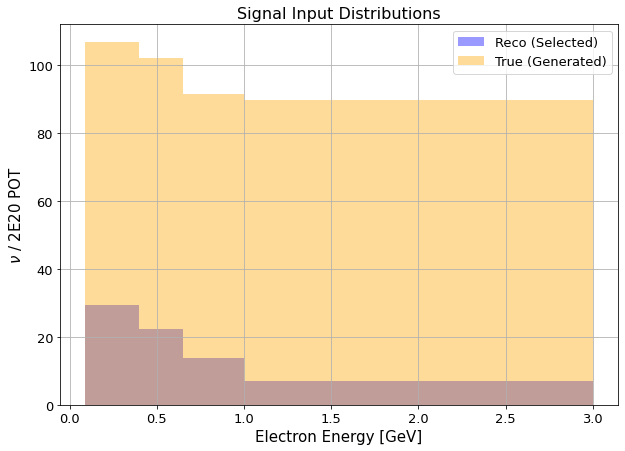

In [11]:
fig = plt.figure(figsize=(10, 7))

plt.hist(bincenters, bins, color='blue', label='Reco (Selected)', range=[bins[0],bins[-1]], alpha=0.4, weights=meas)
plt.hist(bincenters, bins, color='orange', label='True (Generated)', alpha=0.4, range=[bins[0],bins[-1]], weights=true)

plt.legend(fontsize=13)
plt.title('Signal Input Distributions', fontsize=16)

#plt.ylim(0, 5E-40)

plt.xlabel("Electron Energy [GeV]", fontsize=15)
plt.ylabel("$\\nu$ / 2E20 POT", fontsize=15)
    
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#plt.savefig(plots_path+"_InputSignalDistributions_ElectronEnergy.pdf", transparent=True, bbox_inches='tight') 

plt.grid()
plt.show()


## input covariance matrix 

In [12]:
h_cov = f['hcov_tot']

In [13]:
b_cov = list(h_cov.edges[0])
cov = h_cov.values

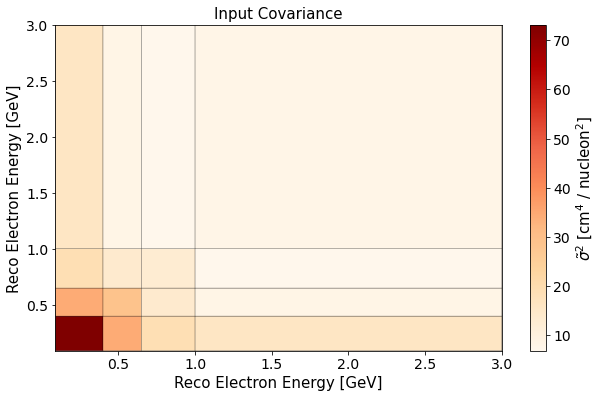

In [14]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(b_cov, b_cov, cov, cmap='OrRd', edgecolors='k' )

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

cbar.set_label("$\\tilde{\\sigma}^{2}$ [cm$^{4}$ / nucleon$^{2}$]", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Reco Electron Energy [GeV]", fontsize=15)
plt.ylabel("Reco Electron Energy [GeV]", fontsize=15)

plt.title('Input Covariance', fontsize=15)

plt.savefig(plots_path+"_InputCovariance_ElectronEnergy.pdf", transparent=True, bbox_inches='tight') 

plt.show()

In [15]:
for i in range(len(bins)-1): 
    print(np.sqrt(cov[i][i]), meas[i])

8.55412349478499 29.396278571874767
5.401292311617946 22.32287202796826
3.59479453845393 13.732955478694258
2.8092653403425434 7.121676461243907


## input response matrix 

In [16]:
h_res = f['hR']

In [17]:
b_res = list(h_res.edges[0])
res = h_res.values

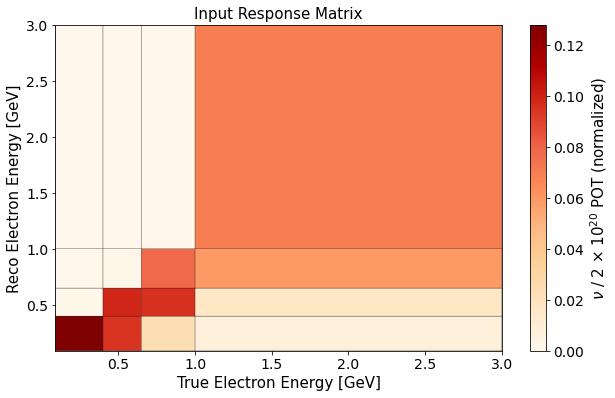

In [18]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(b_res, b_res, res, cmap='OrRd', edgecolors='k', vmin=0)# , vmax=1)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.set_label("$\\nu$ / 2 $\\times$ 10$^{20}$ POT (normalized)", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("True Electron Energy [GeV]", fontsize=15)
plt.ylabel("Reco Electron Energy [GeV]", fontsize=15)

plt.title('Input Response Matrix', fontsize=15)

plt.savefig(plots_path+"_InputResponseMatrix_ElectronEnergy.pdf", transparent=True, bbox_inches='tight') 

plt.show()

In [19]:
# unfolded result

In [20]:
h_unf = f['unf']
unf = list(h_unf.values)

In [21]:
b_meas

[0.09, 0.4, 0.65, 1.0, 3.0]

In [22]:
meas

array([29.39627857, 22.32287203, 13.73295548,  7.12167646])

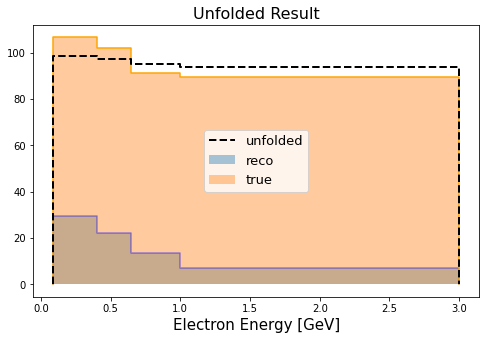

In [23]:
if not xsec_units: 
    fig = plt.figure(figsize=(8, 5))

    plt.step(b_meas+[b_meas[-1]], [0]+list(meas)+[0], alpha=0.4, color='blue')
    plt.fill_between(b_meas+[b_meas[-1]],[0]+list(meas)+[0], step="pre", alpha=0.4, label='reco')


    plt.step(b_meas+[b_meas[-1]], [0]+list(true)+[0], color='orange')
    plt.fill_between(b_meas+[b_meas[-1]],[0]+list(true)+[0], step="pre", alpha=0.4, label='true')


    plt.step(b_meas+[b_meas[-1]], [0]+unf+[0], color='black', linewidth=2, linestyle='--', label='unfolded')

    plt.legend(fontsize=13)

    plt.xlabel("Electron Energy [GeV]", fontsize=15)
    #plt.ylabel("Signal events", fontsize=15)

    #plt.ylim(0, 30)

    plt.legend(fontsize=13)
    plt.title('Unfolded Result', fontsize=16)
    plt.show()

In [24]:
# covariance of unfolded result 

h_unfcov = f['unfcov']


In [25]:
b_unfcov = list(h_unfcov.edges[0])
unfcov = h_unfcov.values
unfcov

array([[518.96118192, 509.41438289, 495.2830893 , 484.85250207],
       [509.41438289, 503.88561823, 495.66258386, 489.60646669],
       [495.2830893 , 495.66258386, 496.23953729, 496.65185328],
       [484.85250207, 489.60646669, 496.65185328, 501.86923066]])

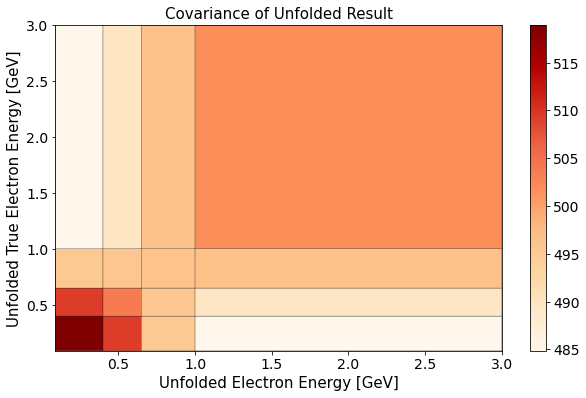

In [26]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(b_unfcov, b_unfcov, unfcov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=1E-81)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Unfolded Electron Energy [GeV]", fontsize=15)
plt.ylabel("Unfolded True Electron Energy [GeV]", fontsize=15)

plt.title('Covariance of Unfolded Result', fontsize=15)

plt.savefig(plots_path+"_UnfoldedCovariance_ElectronEnergy.pdf", transparent=True, bbox_inches='tight') 


plt.show()

In [27]:
# fractional difference between true & unfolded result (diagonals of the cov matrix)

h_frac = f['fracError']
b_frac = [round(var, 2) for var in h_frac.edges]

frac = list(h_frac.values)
frac

[0.2311916724754979,
 0.2308146979990557,
 0.23361839029245374,
 0.2383598474861398]

In [28]:
# bin centers and widths 

bincenters = 0.5*(h_frac.edges[1:]+h_frac.edges[:-1])

binwidth = []
for x in range(len(bincenters)): 
        binwidth.append( round(abs(h_frac.edges[x+1]-h_frac.edges[x])/2, 3) )
binwidth

[0.155, 0.125, 0.175, 1.0]

In [29]:
# manually compute the fractional uncertainty 
fractional_uncertainty = []
for i in range(len(bins)-1): 
    print(unfcov[i][i], unf[i])
    #fractional_uncertainty.append( np.sqrt(unfcov[i][i]/binwidth[i]) / unf[i] )
#fractional_uncertainty

518.9611819153904 98.53607302344983
503.8856182328087 97.25289111247665
496.2395372853691 95.35394257754412
501.86923066450026 93.98578782484489


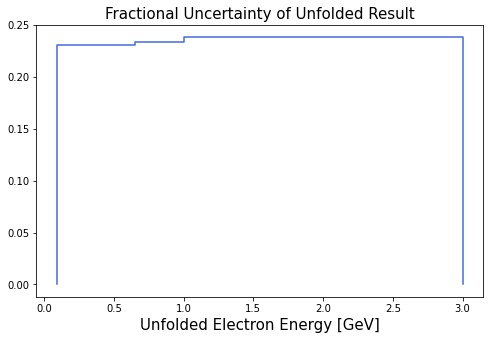

In [30]:
fig = plt.figure(figsize=(8, 5))

# calculate the width of each bin 
#x_err = [ (b_frac[i+1]-b_frac[i])/2 for i in range(len(b_frac)-1) ]
#plt.errorbar(b_frac_centers, frac, linestyle="", xerr=x_err, color="royalblue", label='fractional uncertainty')

plt.step(bins+[bins[-1]], [0]+frac+[0], color="royalblue")

plt.xlabel("Unfolded Electron Energy [GeV]", fontsize=15)

#plt.ylim(0, 1)

plt.title("Fractional Uncertainty of Unfolded Result", fontsize=15)
plt.show()

In [31]:
# fractional difference between model & unfolded result

In [32]:
h_diff = f['diff']

In [33]:
b_diff = list(h_diff.edges)
diff = list(h_diff.values)

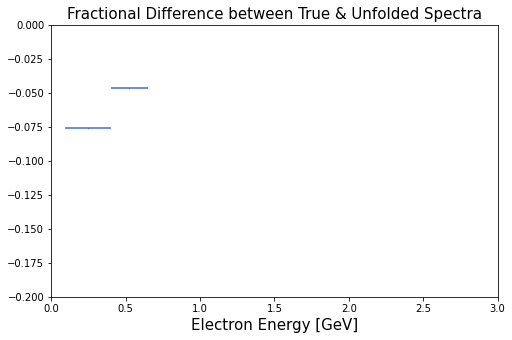

In [34]:
fig = plt.figure(figsize=(8, 5))

plt.errorbar(bincenters, diff, color="royalblue", fmt='.', xerr=binwidth, markersize=1)

plt.xlim(0, 3)
plt.ylim(-0.2, 0)

plt.xlabel("Electron Energy [GeV]", fontsize=15)

plt.title("Fractional Difference between True & Unfolded Spectra", fontsize=15)
plt.show()

In [35]:
# intrinsic bias WRT model 

h_bias = f['bias']


In [36]:
b_bias = list(h_bias.edges)
bias = list(h_bias.values)

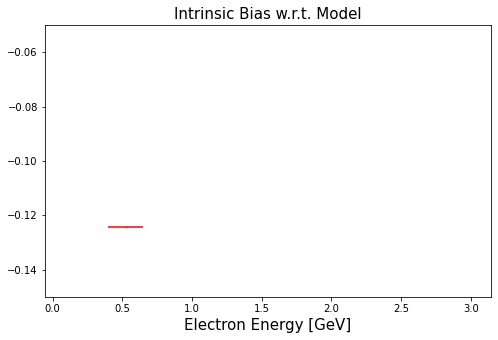

In [37]:
fig = plt.figure(figsize=(8, 5))

#plt.step(b_bias+[b_bias[-1]], [0]+bias+[0], color="red")

plt.errorbar(bincenters, bias, color="red", fmt='.', xerr=binwidth, markersize=1)

plt.xlabel("Electron Energy [GeV]", fontsize=15)

plt.ylim(-0.15, -0.05)
plt.title("Intrinsic Bias w.r.t. Model", fontsize=15)
plt.show()

In [38]:
# regularization matrix A_c 

h_Ac = f['smear']

In [39]:
b_Ac = list(h_Ac.edges[0])
Ac = h_Ac.values

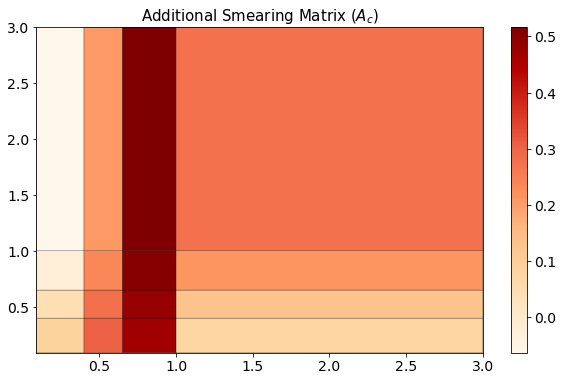

In [40]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(b_Ac, b_Ac, Ac, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.xlabel("cos $\\theta_{ep}$", fontsize=15)
#plt.ylabel("cos $\\theta_{ep}$", fontsize=15)

plt.title('Additional Smearing Matrix ($A_{c}$)', fontsize=15)
#plt.savefig(plots_path+"Regularization.pdf", transparent=True, bbox_inches='tight') 

plt.show()

## Smear the true distribution by Ac

In [41]:
Ac #[row][col] - start from bottom left corner & count from there

array([[ 0.08509426,  0.30602091,  0.47148484,  0.07702956],
       [ 0.04179748,  0.28086082,  0.48448523,  0.13248605],
       [-0.01858123,  0.23734865,  0.50595995,  0.21490221],
       [-0.06301897,  0.20687476,  0.51742818,  0.27834562]])

In [42]:
true

array([106.6414392 , 101.95403875,  91.46146538,  89.74459732])

In [43]:
unf

[98.53607302344983, 97.25289111247665, 95.35394257754412, 93.98578782484489]

In [44]:
smeared = []
s = 0

for i in range(len(b_Ac)-1):
    # compute the smeared bin value 
    for j in range(len(b_Ac)-1): 
        s = s + Ac[i][j]*true[j]

    smeared.append(s)
    s = 0
        
smeared 

[90.31032468463333, 89.29387500862477, 87.77927557232124, 86.6760382344757]

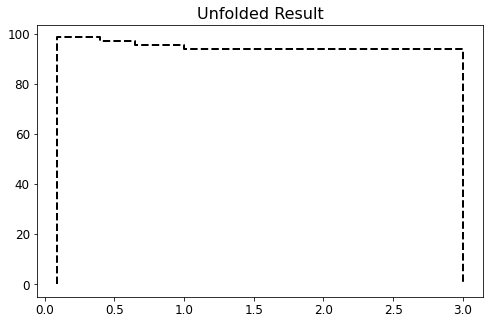

In [45]:
fig = plt.figure(figsize=(8, 5))
   
plt.step(bins+[bins[-1]], [0]+unf+[0], color='black', 
             linewidth=2, linestyle='--', label='unfolded')
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#plt.xlabel("cos $\\theta_{ep}$", fontsize=15)


#plt.savefig(plots_path+"UnfoldedTotalResult_OpeningAngle.pdf", transparent=True, bbox_inches='tight') 

plt.title('Unfolded Result', fontsize=16)
plt.show()

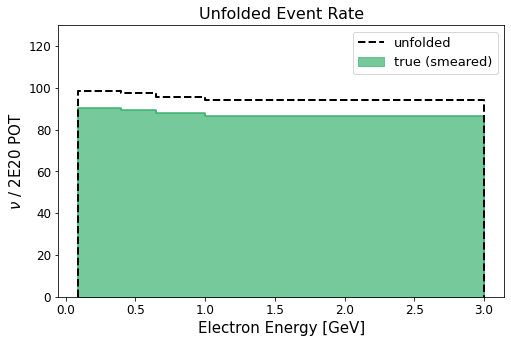

In [65]:
fig = plt.figure(figsize=(8, 5))

## need to efficiency correct here 
#eff = np.array([0.09242640868919844, 0.19218968465940103, 0.23373847959928018, 0.20830255358904098, 0.17850359732045182, 0.1384353084218812]
#)

# true 
#plt.step(bins+[bins[-1]], [0]+true+[0], color='orange', linewidth=2, label='true')

 ## chi2 calculation ## 
chi2 = 0 
# for i,j in zip(n[-1], n_data): 
    # if i>0: 
        #chi2 = chi2 + ((i-j)*(i-j))/i


#if xsec_units: 
    

#    plt.hist(bincenters, bins, color='mediumseagreen', label='true (smeared)', range=[bins[0],bins[-1]], 
#             weights=1E39*(np.array(smeared)/np.array(binwidth)), alpha=0.7)
    
#    plt.step(bins+[bins[-1]], [0]+list(1E39*np.array(unf)/np.array(binwidth))+[0], color='black', 
#             linewidth=2, linestyle='--', label='unfolded')

#    plt.ylabel("d$\\sigma$/d(cos $\\theta_{ep}$) [$10^{-39}$ cm$^{2}$/GeV/nucleon]", fontsize=15)

    
#for i,j in zip(list(np.array(smeared)/np.array(binwidth)), np.array(unf)/np.array(binwidth)):
    # print(i, j)
    # print(((i-j)*(i-j))/i)
#    chi2 = chi2 + ((i-j)*(i-j))/i
    
    
plt.fill_between(bins+[bins[-1]],[0]+smeared+[0], step="pre", alpha=0.7, label='true (smeared)', color='mediumseagreen')
plt.step(bins+[bins[-1]], [0]+smeared+[0], color='mediumseagreen')
    
plt.step(bins+[bins[-1]], [0]+unf+[0], color='black', linewidth=2, linestyle='--', label='unfolded')
    
plt.ylabel("$\\nu$ / 2E20 POT", fontsize=15)
plt.ylim(0, 130)
    

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.xlabel("", fontsize=15)
plt.xlabel("Electron Energy [GeV]", fontsize=15)

#plt.ylim(0, 0.15)
plt.legend(fontsize=13)
plt.title('Unfolded Event Rate', fontsize=16)
#plt.savefig(plots_path+"UnfoldedDifferential_VisibleEnergy.pdf", transparent=True, bbox_inches='tight') 


plt.show()

## Convert to xsec units

In [48]:
# divide by bin width, flux, and n_target 

n_target = parameters(ISRUN3)['n_target']
cv_flux = parameters(ISRUN3)['integrated_flux_per_pot']*parameters(ISRUN3)['beamon_pot']

In [ ]:
plt.fill_between(bins+[bins[-1]],[0]+smeared+[0], step="pre", alpha=0.7, label='true (smeared)', color='mediumseagreen')
plt.step(bins+[bins[-1]], [0]+smeared+[0], color='mediumseagreen')
    
plt.step(bins+[bins[-1]], [0]+unf+[0], color='black', linewidth=2, linestyle='--', label='unfolded')

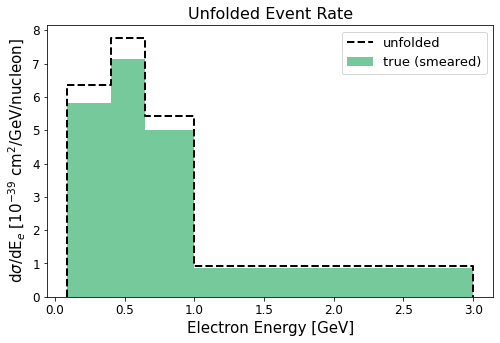

In [64]:
fig = plt.figure(figsize=(8, 5))

plt.hist(bincenters, bins, color='mediumseagreen', label='true (smeared)', range=[bins[0],bins[-1]], 
             weights=1E39*(np.array(smeared)/(n_target*cv_flux*np.array(binwidth))), alpha=0.7)

plt.step(bins+[bins[-1]], [0]+list(1E39*np.array(unf)/(n_target*cv_flux*np.array(binwidth)))+[0], color='black', 
             linewidth=2, linestyle='--', label='unfolded')

    
plt.ylabel("d$\\sigma$/dE$_{e}$ [$10^{-39}$ cm$^{2}$/GeV/nucleon]", fontsize=15)
    

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.xlabel("Electron Energy [GeV]", fontsize=15)

#plt.ylim(0, 0.15)
plt.legend(fontsize=13)
plt.title('Unfolded Event Rate', fontsize=16)

plt.show()